In [4]:
%ls sample_data/

anscombe.json*                data_os_prj.csv        README.md*
california_housing_test.csv   mnist_test.csv
california_housing_train.csv  mnist_train_small.csv


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

In [6]:
df = pd.read_csv('sample_data/data_os_prj.csv')

In [23]:
unique_bm = df['bm'].unique()
unique_malloc = df['malloc'].unique()
headers = header = df.columns.tolist()
header.remove('bm')
header.remove('malloc')

In [100]:
print(unique_bm)
print(unique_malloc)
print(headers)
unique_malloc_legend = ['hoard', 'jemalloc', 'super malloc', 'ptmalloc', 'tcgmalloc']

['cfrac' 'espresso' 'gs' 'larson' 'lua' 'redis']
['hd' 'je' 'sm' 'sys' 'tcg']
['perf-task-clock', 'perf-context-switches', 'perf-cpu-migrations', 'perf-page-faults', 'perf-time', 'perf-user', 'perf-sys', 'time', 'rss', 'user', 'sys', 'page-faults', 'allocs', 'frees', 'bytes allocated', 'massif-mem_heap_B', 'massif-mem_heap_extra_B']


In [168]:

def plot_column(column, normalize):

  bm = 'cfrac'
  malloc = 'hd'
  df2 = df[['bm' , 'malloc', column]]

  l = []
  for malloc in unique_malloc:
    t = df2[df2['malloc'] == malloc]
    t = t[column].tolist()
    l.append(t)

  # print(len(l), len(l[0]))
  if normalize:
    l_norm = copy.deepcopy(l)
    for row in range(len(l)):
      for col in range(len(l[0])):
        l[row][col] = l_norm[row][col]/l_norm[3][col]

  ind = np.arange(len(l[0]))
  width = 0.15
    

  bar1 = plt.bar(ind, l[0], width, color = 'red', edgecolor='black')
  bar2 = plt.bar(ind+width, l[1], width, color='lightgreen', edgecolor='black')
  bar3 = plt.bar(ind+width*2, l[2], width, color = 'orange', edgecolor='black')
  bar4 = plt.bar(ind+width*3, l[3], width, color = 'yellow', edgecolor='black')
  bar5 = plt.bar(ind+width*4, l[4], width, color = 'skyblue', edgecolor='black')

  plt.xlabel("Bench marks")
  plt.ylabel(column)
  Normal = ""
  if normalize:
    Normal ="(Normalized)"


  plt.title("Performance Analysis for " + column + Normal)
    
  plt.xticks(ind+width,unique_bm)
  plt.legend( (bar1, bar2, bar3, bar4, bar5), unique_malloc_legend, loc = 'best', ncol=2)

  plt.savefig('plots/'+ column + Normal + '_plot.png')
  plt.show()


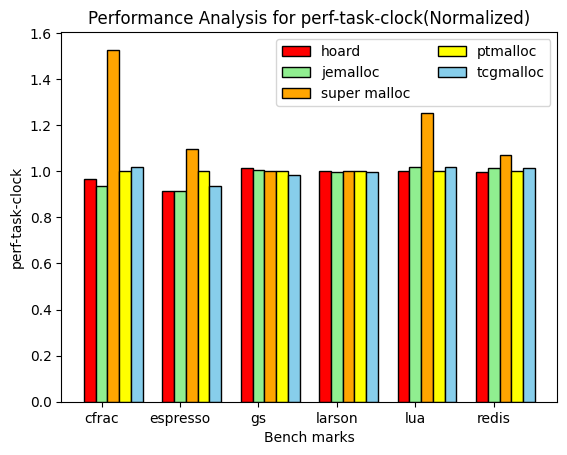

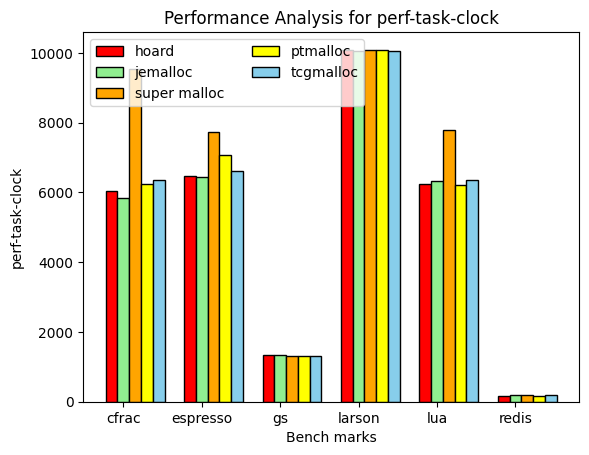

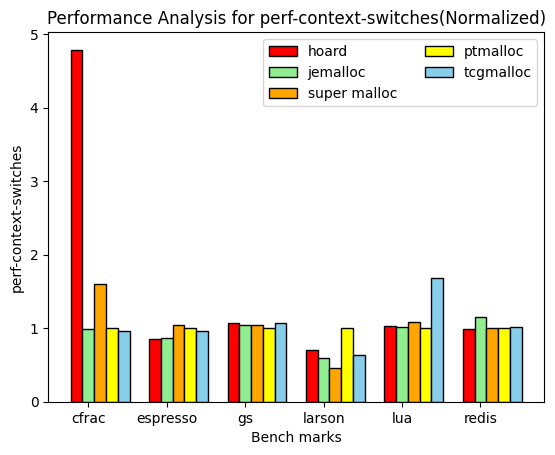

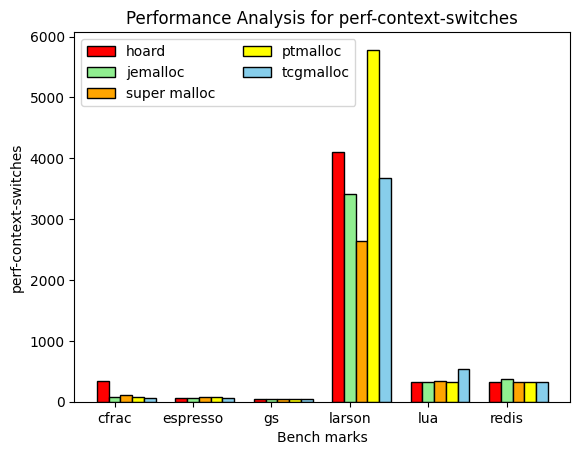

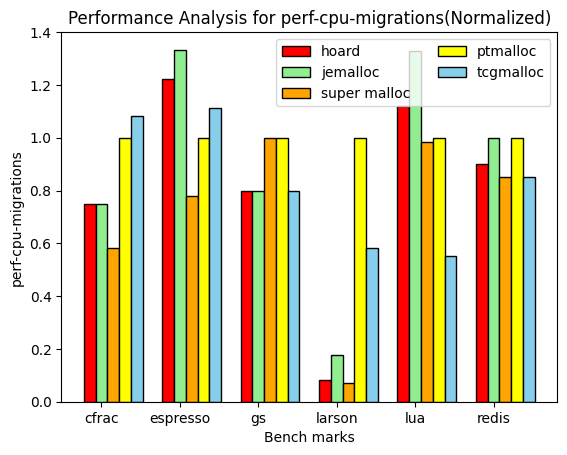

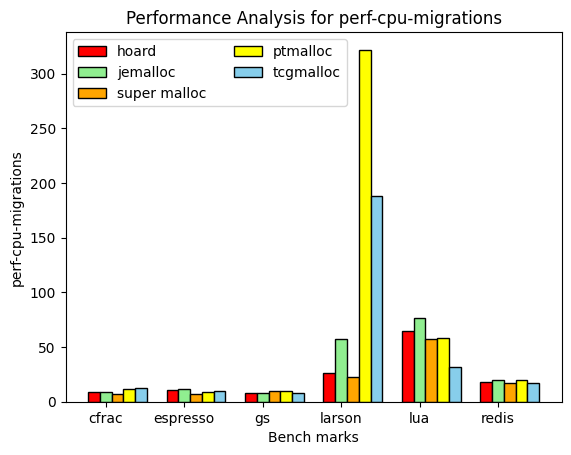

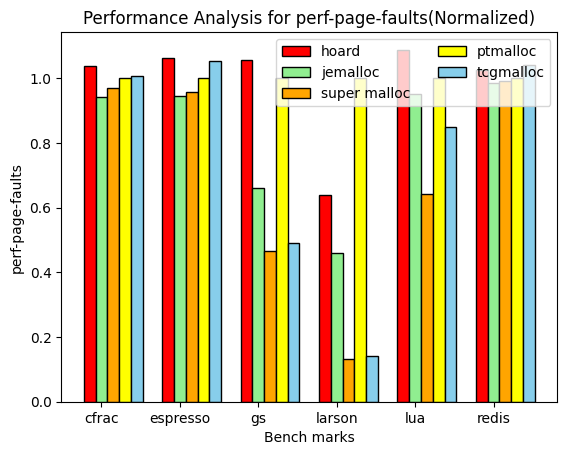

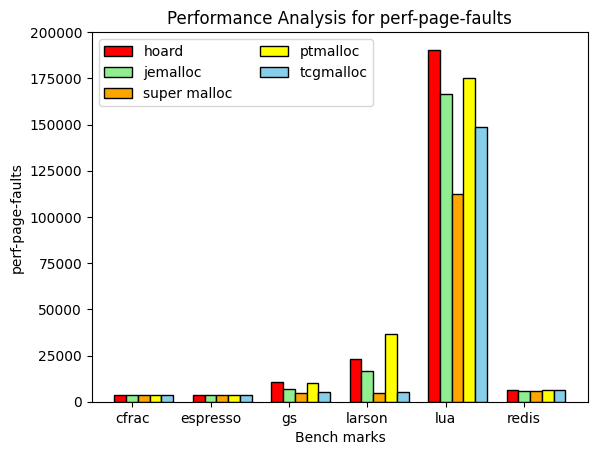

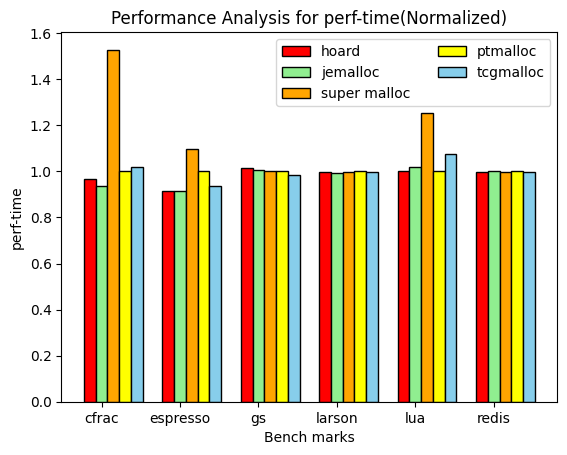

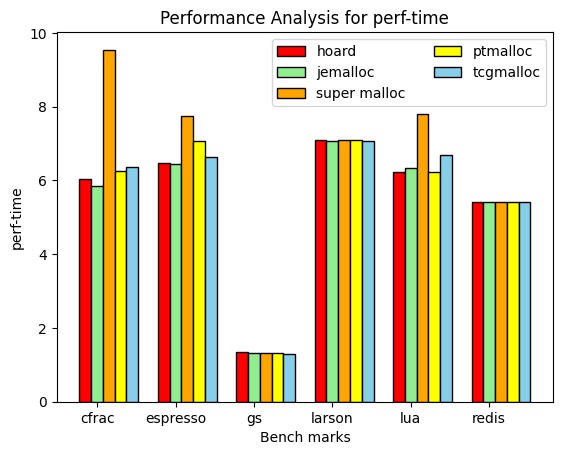

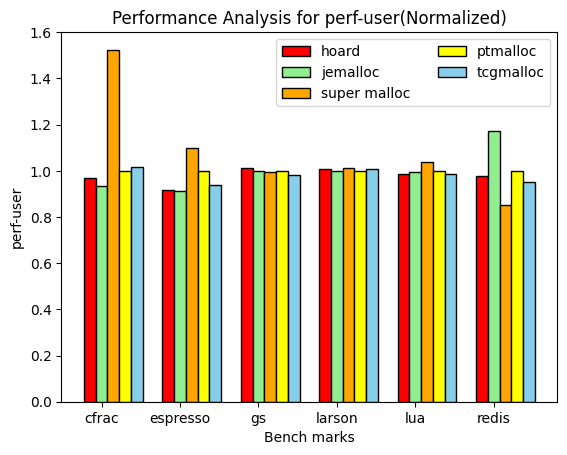

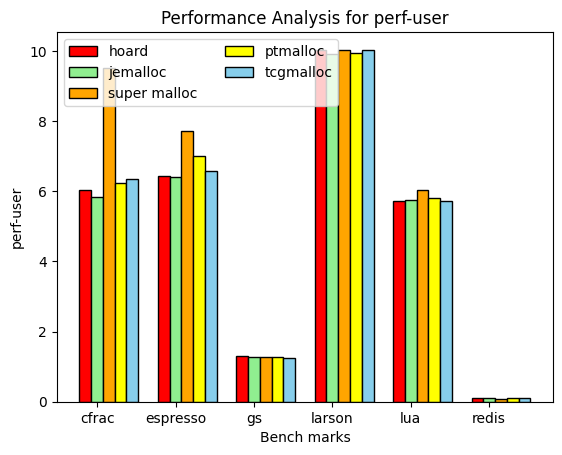

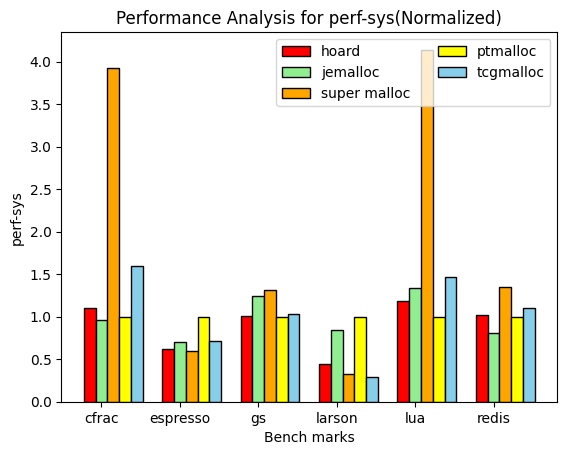

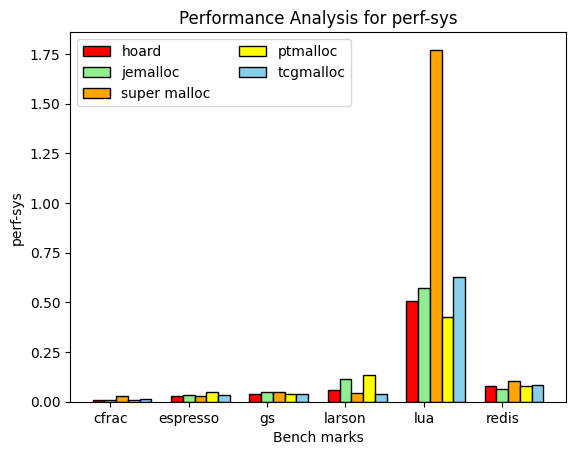

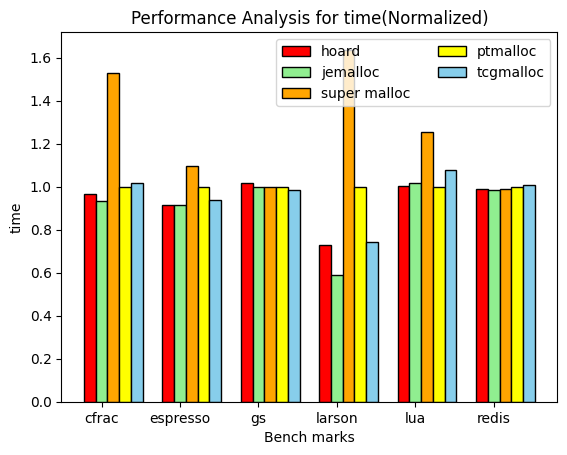

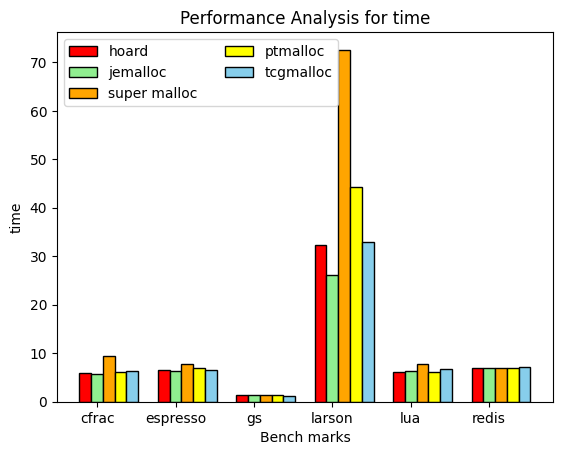

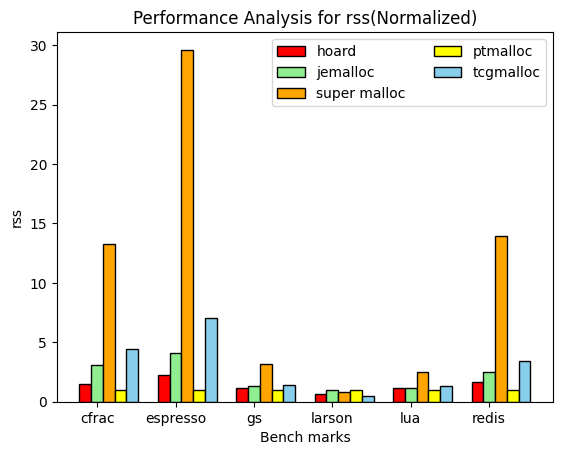

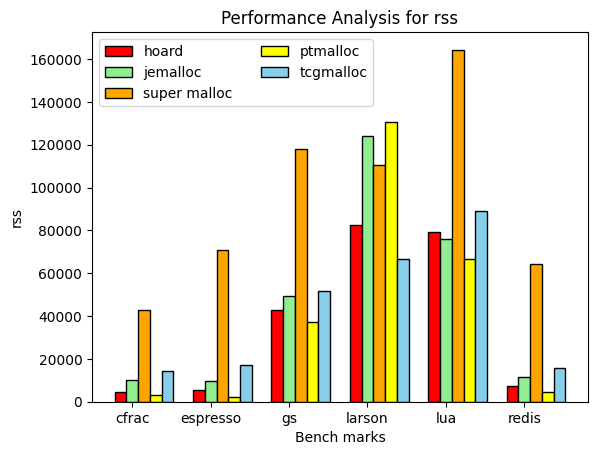

user  ERROR


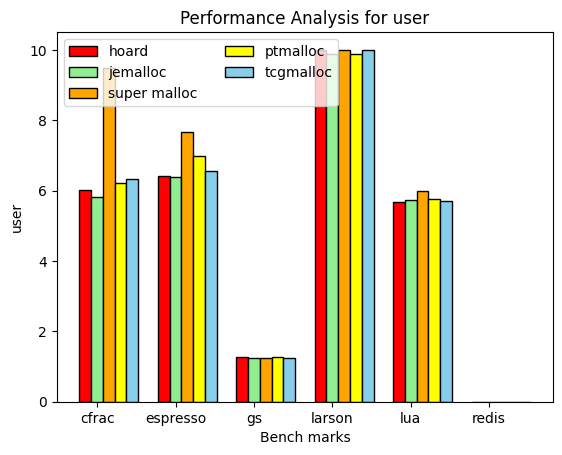

sys  ERROR


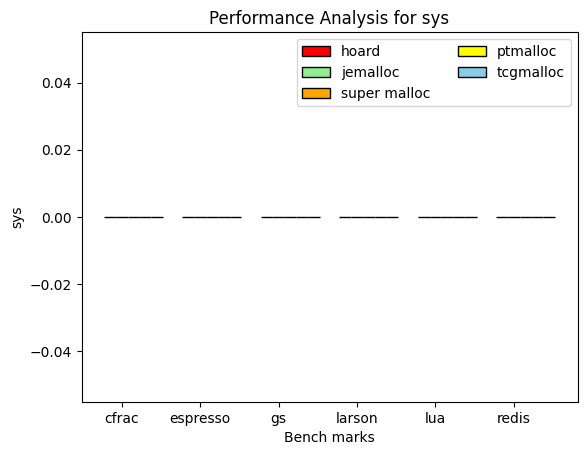

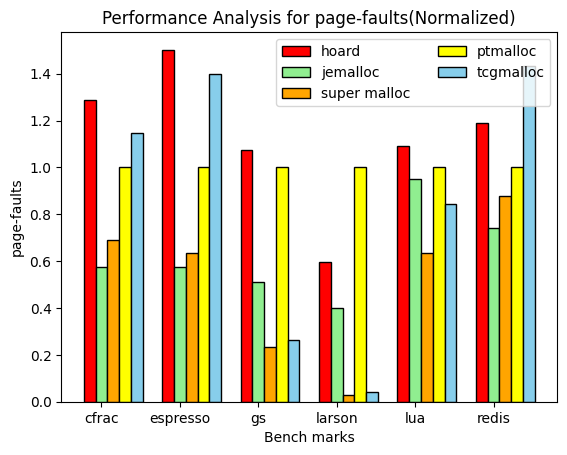

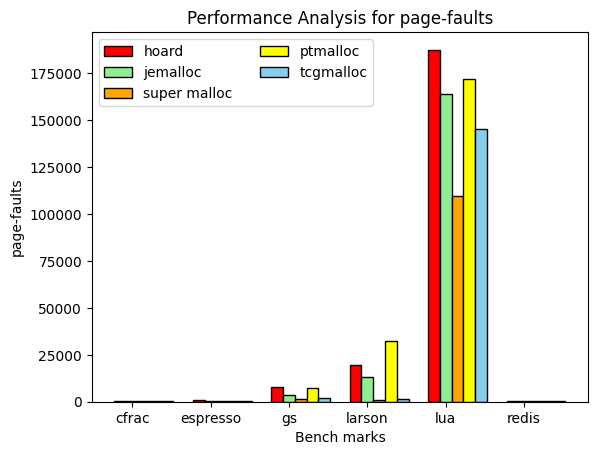

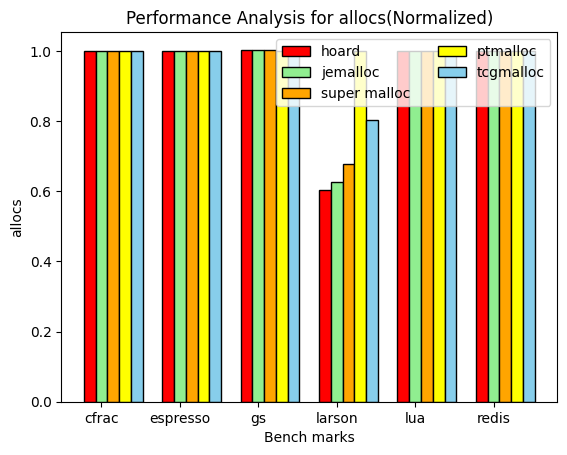

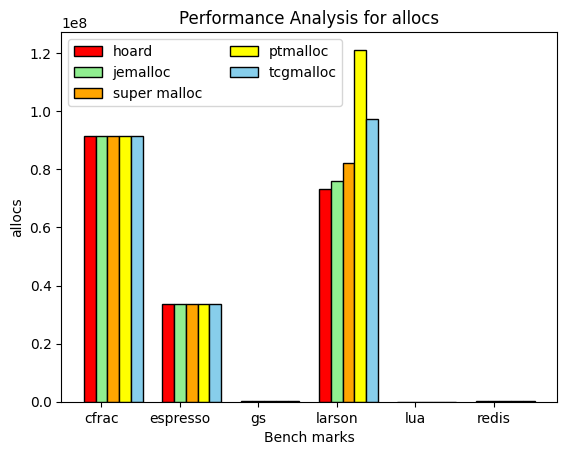

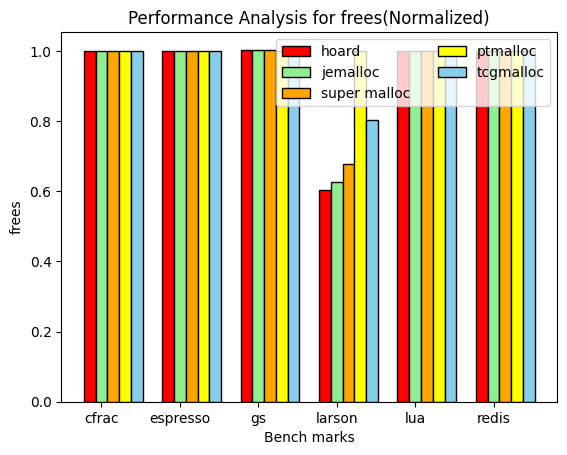

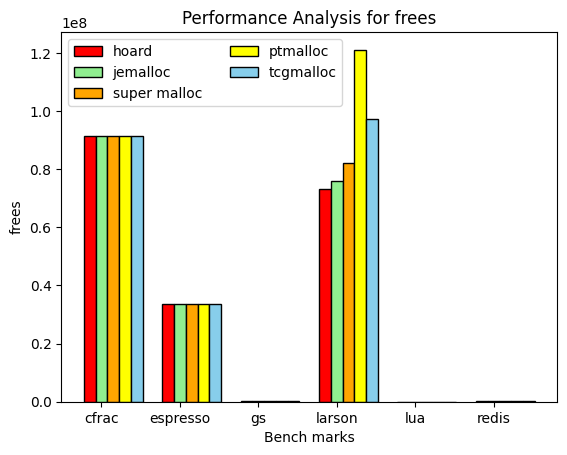

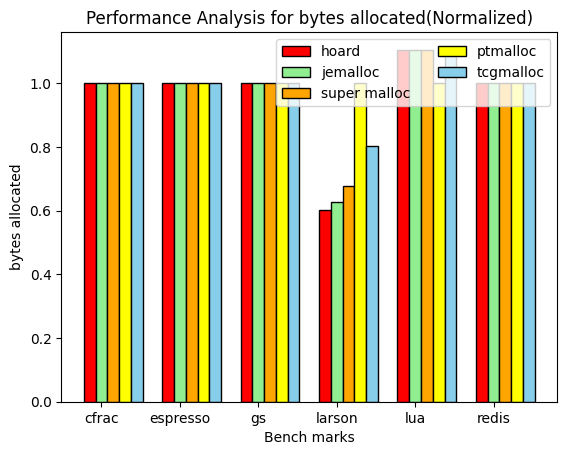

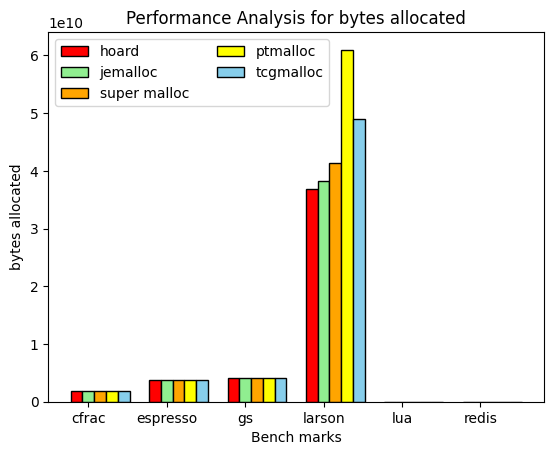

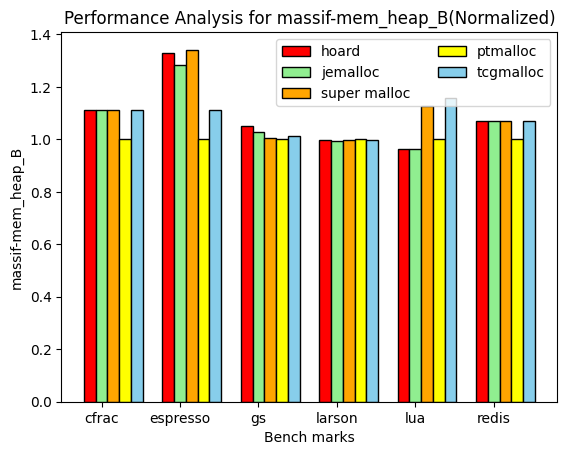

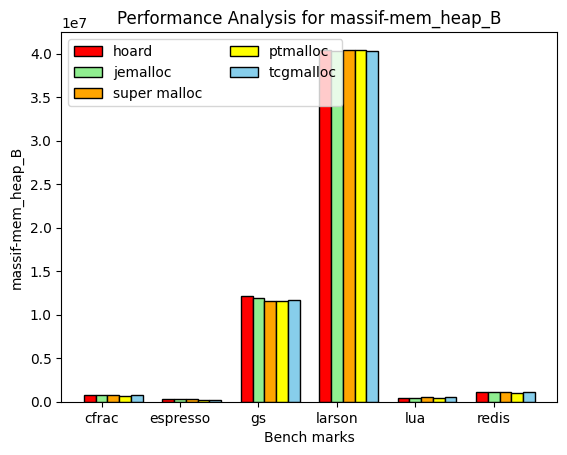

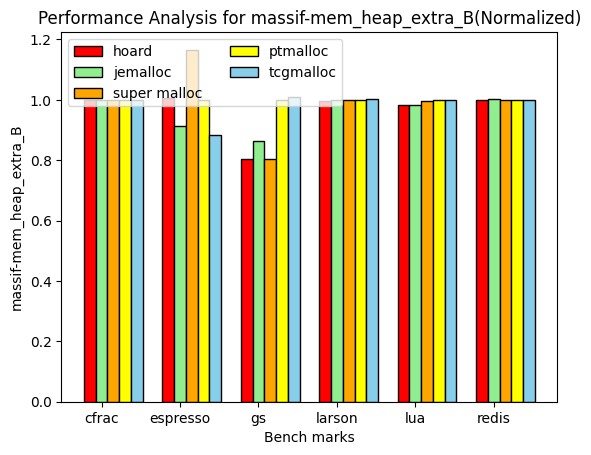

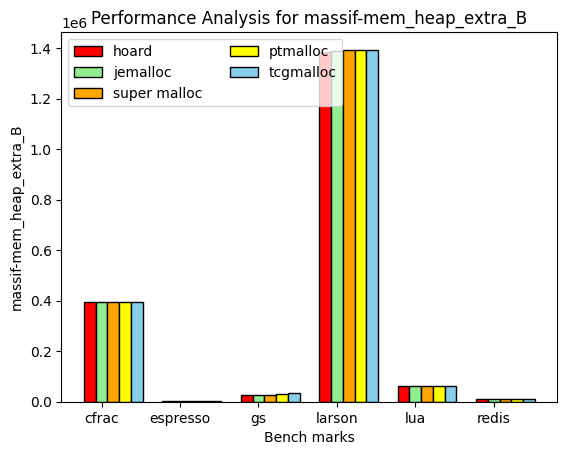

In [169]:
%rm -rf plots
%mkdir plots
for columns in headers:
  try:
    plot_column(columns, True)
  except:
    print(columns, " ERROR")

  try:
    plot_column(columns, False)
  except:
    print(columns, " ERROR")  






In [164]:
%rm -rf plots

In [170]:
import zipfile
import os

def zipfolder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as ziph:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                ziph.write(os.path.join(root, file))

In [173]:
%rm plots.zip
zipfolder('plots/', 'plots.zip')